In [58]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
df = pd.read_csv('selenium_df_scraped.csv')

df = df.drop(index = [53, 65])
# df.iloc[55,:]
df['Market'].value_counts()


In [59]:
### columns preprocessing ################
df = df.drop(columns = ['Unnamed: 0'])
df['Price'] = df['Price'].str.replace(' ', '', regex=False)
df['Price'] = df['Price'].apply(lambda x: re.findall(r'\d+', x)[0])
df['Price per m2'] = df['Price per m2'].apply(lambda x: re.findall(r'\d+\.?\d*', x)[0])
df['Floor'] = df['Floor'].str.replace('Poziom: ', '', regex=False)
df['Furnishing'] = df['Furnishing'].str.extract('(Tak|Nie)')
df['Type of building'] = df['Type of building'].str.replace('Rodzaj zabudowy: ', '', regex=False)
df['Market'] = df['Market'].str.replace('Rynek: ', '', regex=False)
df['Area'] = df['Area'].str.extract('(\d+)')
df['Number of rooms'] = df['Area'].str.extract('(\d+)')

df = pd.get_dummies(df, columns=['Market', 'Type of building', 'Furnishing', 'Type',], drop_first=True)

df['Floor'] = df['Floor'].replace(['Parter'], 0)
df = df.astype({"Price":"int","Price per m2":"float", "Floor": "int", "Floor": "int", "Area": "int", "Number of rooms": "int"})

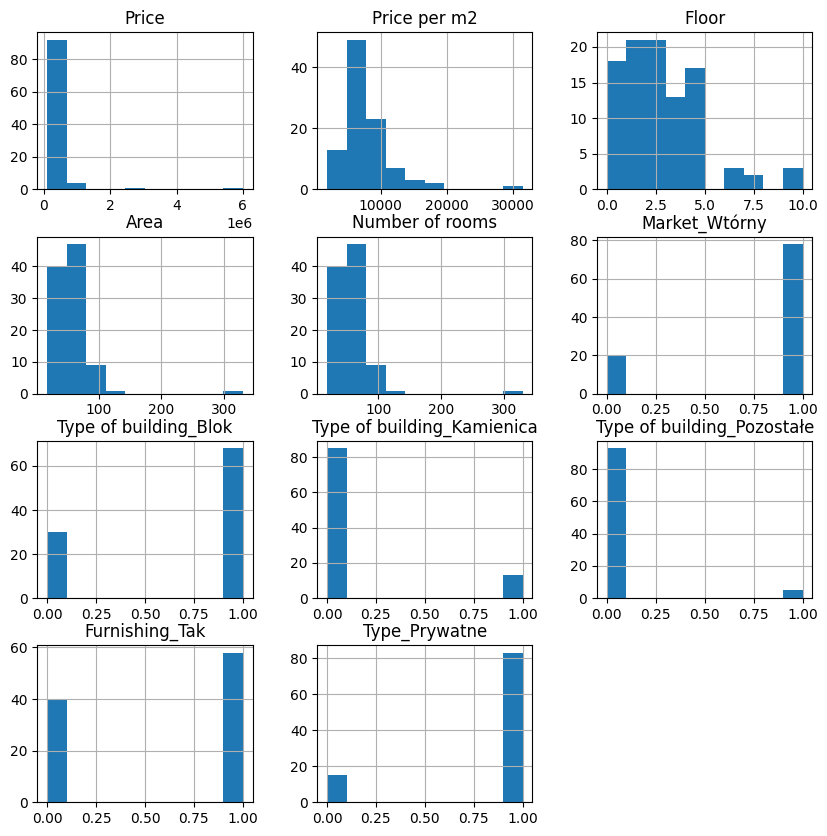

In [68]:

df.hist(figsize=(10, 10))
# fig = plt.figure(figsize=(10, 10))
plt.show() 

In [70]:
import statsmodels.api as sm
X = df.drop(columns = ['Price'])
X = sm.add_constant(X)
y = df['Price']

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     124.3
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           4.09e-46
Time:                        10:05:41   Log-Likelihood:                -1318.6
No. Observations:                  98   AIC:                             2657.
Df Residuals:                      88   BIC:                             2683.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               